# K-Nearest Neighbors (KNN) Model for Insurance Charges Prediction

This notebook implements a KNN regression model to predict insurance charges based on various features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

## Step 1: Load Dataset

In [2]:
dataset = pd.read_csv(r"insurance_corrupted.csv")
df = pd.DataFrame(dataset)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1338, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,NaN,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,NaN,no,northwest,21984.47061
4,32,male,28.880,NaN,no,northwest,3866.85520


## Step 2: Check for Missing Values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercenatage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

Missing values per column:
age         0
sex         0
bmi         1
children    6
smoker      0
region      0
charges     0
dtype: int64

Percentage of missing values:
age         0.000000
sex         0.000000
bmi         0.074738
children    0.448430
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64


## Step 3: Extract Features and Target

In [ ]:

A = df.iloc[:, :-1].values  
B = df.iloc[:, -1].values   

print("Features shape:", A.shape)
print("Target shape:", B.shape)
print("\nFeat]ures (first 3 rows):")
print(A[:3])
print("\nTarget (first 5 values):")
print(B[:5])

Features shape: (1338, 6)
Target shape: (1338,)

Feat]ures (first 3 rows):
[[19 'female' nan nan 'yes' 'southwest']
 [18 'male' 33.77 1.0 'no' 'southeast']
 [28 'male' 33.0 3.0 'no' 'southeast']]

Target (first 5 values):
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


## Step 4: Handle Missing Values with Mean Imputation

In [ ]:
print("=== BEFORE Imputation ===")
print("Features with NaN (first 5 rows):")
print(A[:5])

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
A[:, [0, 2, 3]] = imputer.fit_transform(A[:, [0, 2, 3]])  
A[:, 3] = A[:, 3].astype(int) 

print("\n=== AFTER Imputation ===")
print("Features (no NaN, first 5 rows):")
print(A[:5])

=== BEFORE Imputation ===
Features with NaN (first 5 rows):
[[19 'female' nan nan 'yes' 'southwest']
 [18 'male' 33.77 1.0 'no' 'southeast']
 [28 'male' 33.0 3.0 'no' 'southeast']
 [33 'male' 22.705 nan 'no' 'northwest']
 [32 'male' 28.88 nan 'no' 'northwest']]

=== AFTER Imputation ===
Features (no NaN, first 5 rows):
[[19.0 'female' 30.66546372475692 1 'yes' 'southwest']
 [18.0 'male' 33.77 1 'no' 'southeast']
 [28.0 'male' 33.0 3 'no' 'southeast']
 [33.0 'male' 22.705 1 'no' 'northwest']
 [32.0 'male' 28.88 1 'no' 'northwest']]


## Step 5: Label Encoding for Categorical Variables

In [ ]:
print("=== BEFORE Label Encoding ===")
print("Data type:", A.dtype)
print("Features (first 3 rows):")
for i in range(3):
    print(f"  Row {i}: {A[i]}")


A_encoded = np.zeros((A.shape[0], A.shape[1]), dtype=np.float64)

# Copy numeric columns (age, bmi, children)
A_encoded[:, [0, 2, 3]] = A[:, [0, 2, 3]].astype(float)

le_sex = LabelEncoder()
A_encoded[:, 1] = le_sex.fit_transform(A[:, 1])  

le_smoker = LabelEncoder()
A_encoded[:, 4] = le_smoker.fit_transform(A[:, 4])  

le_region = LabelEncoder()
A_encoded[:, 5] = le_region.fit_transform(A[:, 5])  


A = A_encoded

print("\n=== AFTER Label Encoding ===")
print("Data type:", A.dtype)
print("Features (first 3 rows):")
for i in range(3):
    print(f"  Row {i}: {A[i]}")

print("\nEncoding mappings:")
print("Sex:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("Smoker:", dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_))))
print("Region:", dict(zip(le_region.classes_, le_region.transform(le_region.classes_))))

=== BEFORE Label Encoding ===
Data type: object
Features (first 3 rows):
  Row 0: [19.0 'female' 30.66546372475692 1 'yes' 'southwest']
  Row 1: [18.0 'male' 33.77 1 'no' 'southeast']
  Row 2: [28.0 'male' 33.0 3 'no' 'southeast']

=== AFTER Label Encoding ===
Data type: float64
Features (first 3 rows):
  Row 0: [19.          0.         30.66546372  1.          1.          3.        ]
  Row 1: [18.    1.   33.77  1.    0.    2.  ]
  Row 2: [28.  1. 33.  3.  0.  2.]

Encoding mappings:
Sex: {'female': np.int64(0), 'male': np.int64(1)}
Smoker: {'no': np.int64(0), 'yes': np.int64(1)}
Region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


## Step 6: Train-Test Split

We split the data into 80% training and 20% testing sets.

In [7]:
print("=== Splitting the Dataset ===")
print(f"Before split: Total samples = {len(A)}")

A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.2, random_state=48)

print(f"\nAfter split:")
print(f"  Training samples = {len(A_train)}")
print(f"  Test samples = {len(A_test)}")
print(f"  Split ratio = {len(A_train)/len(A)*100:.1f}% train, {len(A_test)/len(A)*100:.1f}% test")

=== Splitting the Dataset ===
Before split: Total samples = 1338

After split:
  Training samples = 1070
  Test samples = 268
  Split ratio = 80.0% train, 20.0% test


## Step 7: Feature Scaling with StandardScaler

**IMPORTANT for KNN:** Feature scaling is CRITICAL for KNN because it uses distance calculations. Features with larger scales will dominate the distance metric.

In [ ]:
print("=== BEFORE Feature Scaling ===")
print("\nTraining Features (first 3 rows, raw values):")
for i in range(3):
    print(f"  {A_train[i]}")


scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

print("\n=== AFTER Feature Scaling ===")
print("\nTraining Features (first 3 rows, scaled values):")
for i in range(3):
    print(f"  {A_train_scaled[i]}")

print("\n=== Scaler Statistics ===")
print("Feature Means:", scaler.mean_)
print("Feature Standard Deviations:", scaler.scale_)

print("\n=== Final Dataset Shapes ===")
print(f"A_train_scaled: {A_train_scaled.shape}")
print(f"A_test_scaled: {A_test_scaled.shape}")
print(f"b_train: {b_train.shape}")
print(f"b_test: {b_test.shape}")

=== BEFORE Feature Scaling ===

Training Features (first 3 rows, raw values):
  [52.   0.  25.3  2.   1.   2. ]
  [20.    1.   35.31  1.    0.    2.  ]
  [28.    1.   38.06  0.    0.    2.  ]

=== AFTER Feature Scaling ===

Training Features (first 3 rows, scaled values):
  [ 0.91675007 -1.01317084 -0.88491459  0.73519548  1.93248888  0.43597443]
  [-1.3746232   0.98700038  0.78448136 -0.09199607 -0.5174674   0.43597443]
  [-0.80177988  0.98700038  1.24310661 -0.91918761 -0.5174674   0.43597443]

=== Scaler Statistics ===
Feature Means: [39.19719626  0.50654206 30.60610791  1.11121495  0.21121495  1.51775701]
Feature Standard Deviations: [13.96542431  0.4999572   5.99618086  1.20890984  0.40817055  1.10612678]

=== Final Dataset Shapes ===
A_train_scaled: (1070, 6)
A_test_scaled: (268, 6)
b_train: (1070,)
b_test: (268,)


## Step 8: Understanding K-Nearest Neighbors (KNN)

**How KNN Works:**
1. For a new data point, find the K nearest neighbors in the training data
2. For regression: Average the target values of those K neighbors
3. The distance metric (usually Euclidean) determines "nearness"

**Key Hyperparameter:**
- **K (n_neighbors)**: Number of neighbors to consider
  - Small K: More sensitive to noise, complex decision boundary
  - Large K: Smoother predictions, simpler model
  - We'll test different K values to find the optimal one

## Step 9: Finding the Optimal K Value

We'll test K values from 1 to 20 and see which gives the best performance.

In [ ]:

k_values = range(1, 21)
rmse_values = []
r2_values = []

print("Testing different K values...\n")
print(f"{'K':<5} {'RMSE':<15} {'R² Score':<15}")
print("-" * 40)

for k in k_values:

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(A_train_scaled, b_train)

    y_pred = knn.predict(A_test_scaled)
    

    rmse = np.sqrt(mean_squared_error(b_test, y_pred))
    r2 = r2_score(b_test, y_pred)
    
    rmse_values.append(rmse)
    r2_values.append(r2)
    
    print(f"{k:<5} {rmse:<15.2f} {r2:<15.4f}")

optimal_k = k_values[np.argmin(rmse_values)]
print(f"\n{'='*40}")
print(f"Optimal K value: {optimal_k}")
print(f"Best RMSE: {min(rmse_values):.2f}")
print(f"Best R² Score: {max(r2_values):.4f}")
print(f"{'='*40}")

Testing different K values...

K     RMSE            R² Score       
----------------------------------------
1     7343.55         0.6683         
2     5980.30         0.7800         
3     5767.23         0.7954         
4     5870.94         0.7880         
5     5720.79         0.7987         
6     5594.21         0.8075         
7     5525.08         0.8123         
8     5533.08         0.8117         
9     5564.15         0.8096         
10    5538.71         0.8113         
11    5525.67         0.8122         
12    5489.00         0.8147         
13    5445.95         0.8176         
14    5402.68         0.8205         
15    5388.47         0.8214         
16    5368.87         0.8227         
17    5406.38         0.8202         
18    5451.95         0.8172         
19    5452.07         0.8172         
20    5484.68         0.8150         

Optimal K value: 16
Best RMSE: 5368.87
Best R² Score: 0.8227


## Step 10: Visualize K Value Performance

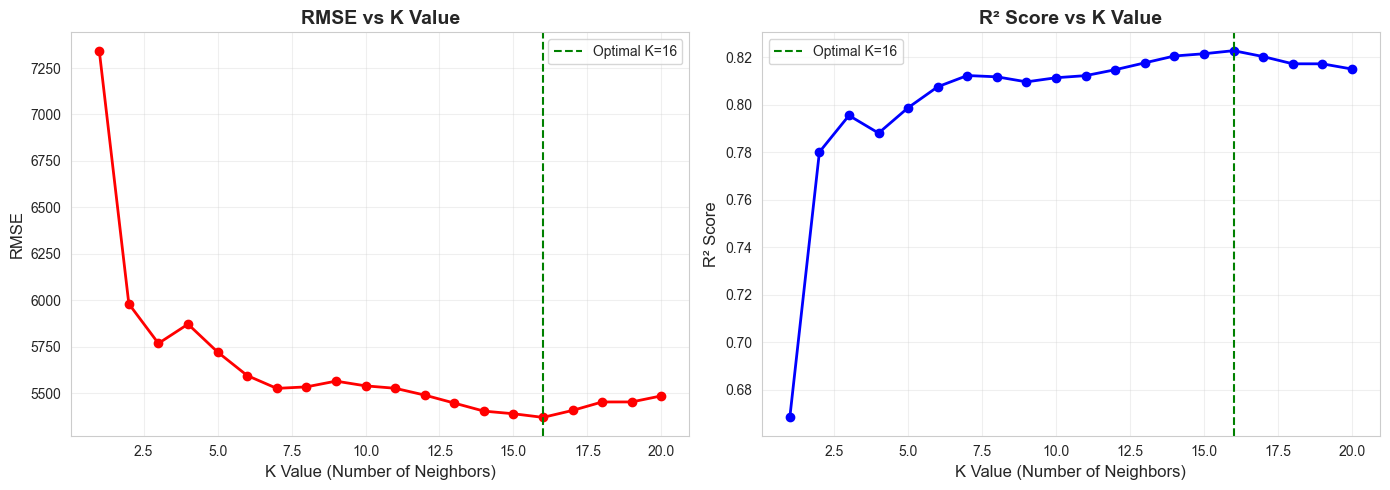

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(k_values, rmse_values, marker='o', linestyle='-', color='red', linewidth=2)
axes[0].axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal K={optimal_k}')
axes[0].set_xlabel('K Value (Number of Neighbors)', fontsize=12)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('RMSE vs K Value', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].plot(k_values, r2_values, marker='o', linestyle='-', color='blue', linewidth=2)
axes[1].axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal K={optimal_k}')
axes[1].set_xlabel('K Value (Number of Neighbors)', fontsize=12)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('R² Score vs K Value', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 11: Train Final KNN Model with Optimal K

In [ ]:
print(f"Training final KNN model with K={optimal_k}...\n")

knn_model = KNeighborsRegressor(n_neighbors=optimal_k)


knn_model.fit(A_train_scaled, b_train)

print("✓ Model trained successfully!")
print(f"\nModel Details:")
print(f"  Algorithm: K-Nearest Neighbors Regression")
print(f"  Number of Neighbors (K): {optimal_k}")
print(f"  Distance Metric: Euclidean (default)")
print(f"  Training samples: {len(A_train_scaled)}")

Training final KNN model with K=16...

✓ Model trained successfully!

Model Details:
  Algorithm: K-Nearest Neighbors Regression
  Number of Neighbors (K): 16
  Distance Metric: Euclidean (default)
  Training samples: 1070


## Step 12: Make Predictions

In [ ]:

y_pred = knn_model.predict(A_test_scaled)

print("First 10 predictions vs actual values:\n")


comparison = pd.DataFrame({
    "Actual Charges": b_test,
    "Predicted Charges": y_pred,
    "Difference": b_test - y_pred,
    "Absolute Error": np.abs(b_test - y_pred)
})

comparison.head(10)

First 10 predictions vs actual values:



,Actual Charges,Predicted Charges,Difference,Absolute Error
0,4032.24070,6227.249930,-2195.009230,2195.009230
1,4433.91590,6816.227841,-2382.311941,2382.311941
2,5002.78270,5679.669494,-676.886794,676.886794
3,2855.43755,2746.176575,109.260975,109.260975
4,1712.22700,2667.611115,-955.384115,955.384115
5,4746.34400,7199.222485,-2452.878485,2452.878485
6,35491.64000,30658.159893,4833.480107,4833.480107
7,5846.91760,7514.753481,-1667.835881,1667.835881
8,11881.96960,11682.082157,199.887443,199.887443
9,7537.16390,7806.451506,-269.287606,269.287606


## Step 13: Model Evaluation Metrics

In [ ]:

mse = mean_squared_error(b_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(b_test, y_pred)
mae = np.mean(np.abs(b_test - y_pred))

print("="*50)
print("KNN MODEL PERFORMANCE METRICS")
print("="*50)
print(f"\nMean Squared Error (MSE):        ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE):       ${mae:,.2f}")
print(f"R² Score:                        {r2:.4f}")
print(f"\nInterpretation:")
print(f"  - On average, predictions are off by ${rmse:,.2f}")
print(f"  - The model explains {r2*100:.2f}% of the variance in charges")
print("="*50)

KNN MODEL PERFORMANCE METRICS

Mean Squared Error (MSE):        $28,824,760.56
Root Mean Squared Error (RMSE):  $5,368.87
Mean Absolute Error (MAE):       $3,180.69
R² Score:                        0.8227

Interpretation:
  - On average, predictions are off by $5,368.87
  - The model explains 82.27% of the variance in charges


## Step 14: Visualize Predictions

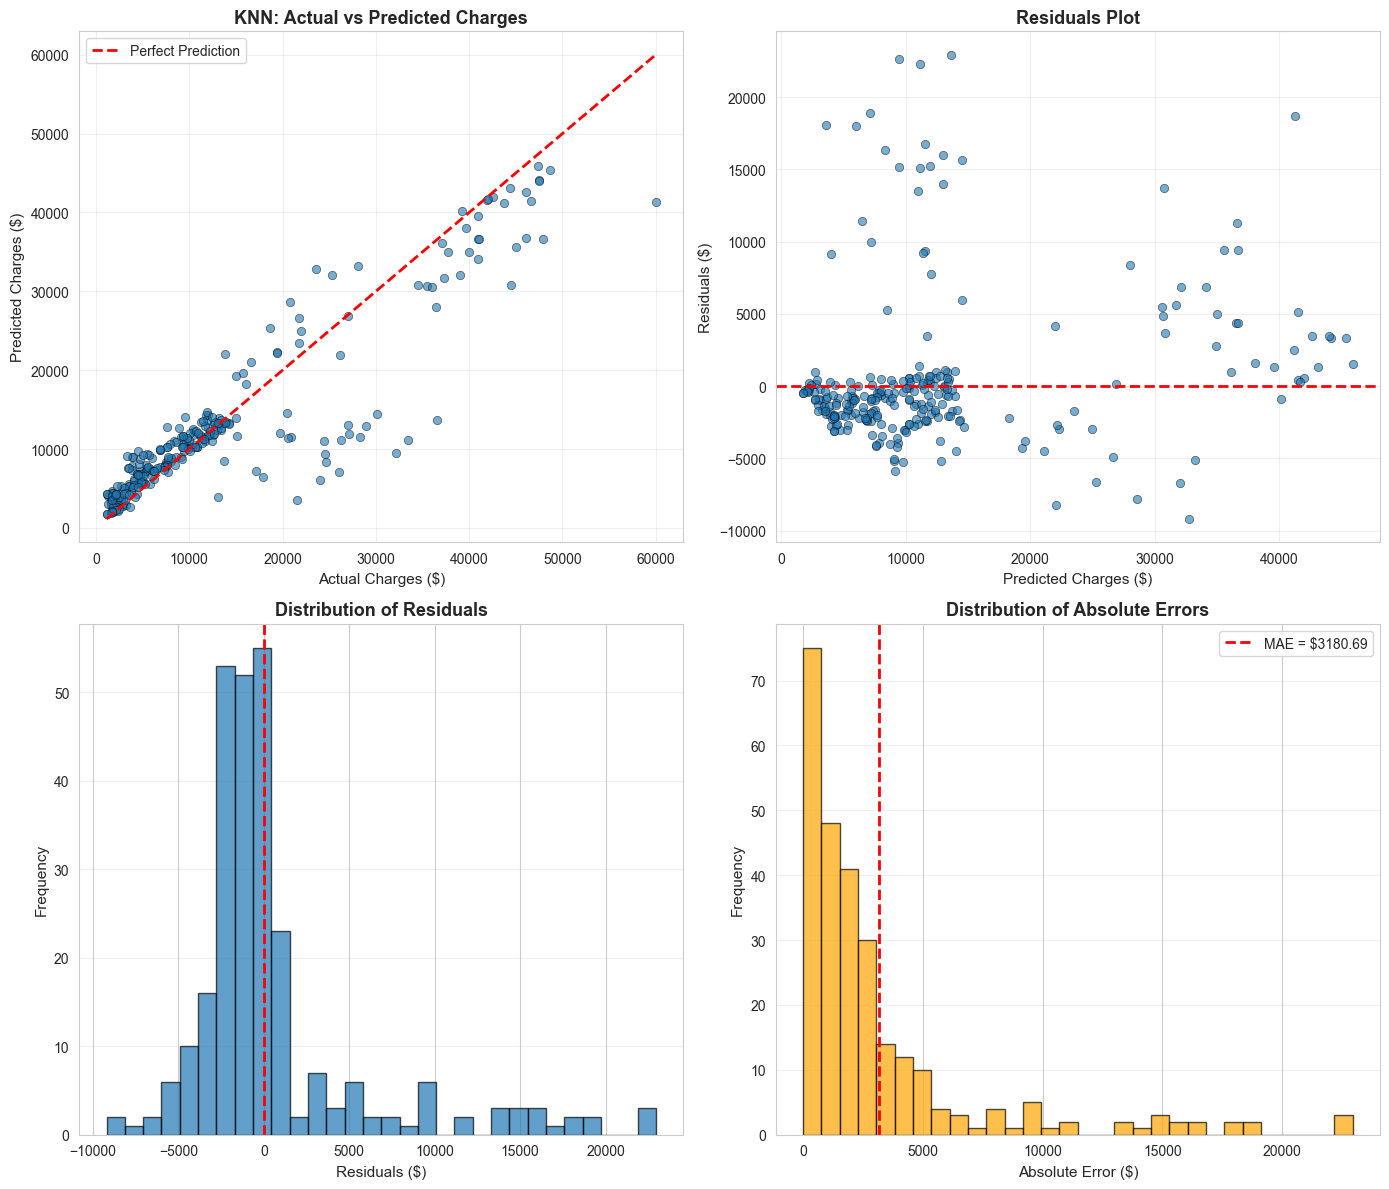

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Actual vs Predicted Scatter Plot
axes[0, 0].scatter(b_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Charges ($)', fontsize=11)
axes[0, 0].set_ylabel('Predicted Charges ($)', fontsize=11)
axes[0, 0].set_title('KNN: Actual vs Predicted Charges', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals = b_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Charges ($)', fontsize=11)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=11)
axes[0, 1].set_title('Residuals Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of Residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals ($)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Prediction Error Distribution
absolute_errors = np.abs(residuals)
axes[1, 1].hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=mae, color='r', linestyle='--', linewidth=2, 
                   label=f'MAE = ${mae:.2f}')
axes[1, 1].set_xlabel('Absolute Error ($)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of Absolute Errors', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Step 15: Model Summary and Comparison

Let's compare our KNN model with the Linear Regression baseline.

In [15]:
print("="*60)
print("DATA PREPROCESSING & MODELING PIPELINE SUMMARY")
print("="*60)
print(f"\n✓ Loaded dataset: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"✓ Handled missing values using Mean Imputation")
print(f"✓ Label Encoded 3 categorical columns (sex, smoker, region)")
print(f"✓ Split dataset: {len(A_train)} training, {len(A_test)} test")
print(f"✓ Applied StandardScaler feature normalization (CRITICAL for KNN!)")
print(f"✓ Tested K values from 1 to 20")
print(f"✓ Trained KNN model with optimal K={optimal_k}")

print(f"\n{'='*60}")
print("FINAL MODEL PERFORMANCE")
print("="*60)
print(f"Model: K-Nearest Neighbors (K={optimal_k})")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE:  ${mae:,.2f}")
print(f"R² Score: {r2:.4f} ({r2*100:.2f}% variance explained)")
print("="*60)

print("\n💡 Key Insights:")
print(f"   • The model predicts charges within ±${rmse:,.0f} on average")
print(f"   • Using {optimal_k} neighbors provides the best balance")
print(f"   • Feature scaling was essential for KNN performance")
print(f"   • The model explains {r2*100:.1f}% of variance in insurance charges")

DATA PREPROCESSING & MODELING PIPELINE SUMMARY

✓ Loaded dataset: 1338 samples, 7 columns
✓ Handled missing values using Mean Imputation
✓ Label Encoded 3 categorical columns (sex, smoker, region)
✓ Split dataset: 1070 training, 268 test
✓ Applied StandardScaler feature normalization (CRITICAL for KNN!)
✓ Tested K values from 1 to 20
✓ Trained KNN model with optimal K=16

FINAL MODEL PERFORMANCE
Model: K-Nearest Neighbors (K=16)
RMSE: $5,368.87
MAE:  $3,180.69
R² Score: 0.8227 (82.27% variance explained)

💡 Key Insights:
   • The model predicts charges within ±$5,369 on average
   • Using 16 neighbors provides the best balance
   • Feature scaling was essential for KNN performance
   • The model explains 82.3% of variance in insurance charges


## Conclusion: KNN vs Linear Regression (تحبيشة)

**Advantages of KNN:**
- No assumptions about data distribution
- Can capture non-linear relationships
- Simple and intuitive algorithm

**Disadvantages of KNN:**
- Computationally expensive for large datasets
- Sensitive to irrelevant features
- Requires careful feature scaling
- Memory-intensive (stores entire training set)

**When to use KNN:**
- Small to medium-sized datasets
- Non-linear relationships expected
- When interpretability is less important

**Next Steps:**
1. Try different distance metrics (Manhattan, Minkowski)
2. Implement weighted KNN (closer neighbors have more influence)
3. Feature engineering to improve predictions
4. Compare with other algorithms (Random Forest, Gradient Boosting)